In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [8]:
import os

In [2]:
import json

In [3]:
from prettytable import PrettyTable

In [4]:
from prettytable import MSWORD_FRIENDLY,MARKDOWN

In [5]:
class DataSet:
    def __init__(self):
        self.data = []
    def makePrettyTable(columns, labels):
        table = PrettyTable()
        for i in range(len(columns)):
            table.add_column(labels[i], columns[i])
        return table
           

In [37]:
class ThicknessesAnalysis(DataSet):
    def addData(self, fileName):
        with open(fileName, "r") as read_file:
            self.data = self.data + json.load(read_file)
            self.x = [[float(el['th1']),float(el['th2']), float(el['th3'])] for el in self.data]
    def learn_MTF(self):
        self.MTF = [float(el['min_MTF']) for el in self.data]
        self.MTFModel = LinearRegression()
        self.MTFModel.fit(self.x, self.MTF)
        self.MTF_score = self.MTFModel.score(self.x, self.MTF)
        self.MTF_analytical =lambda el: self.MTFModel.intercept_ + self.MTFModel.coef_[0]*float(el['th1'])+self.MTFModel.coef_[1]*float(el['th2'])+self.MTFModel.coef_[2]*float(el['th3']) 
        self.MTF_real_pred = [
            {
                'th1': el['th1'],
                'th2': el['th2'],
                'th3': el['th3'],
                'real': float(el['min_MTF']),
                'predicted': self.MTF_analytical(el)
            }
            for el in self.data
        ]
    def print_MTF_table(self):
        columns = []
        columns.append([el['th1'] for el in self.MTF_real_pred])
        columns.append([el['th2'] for el in self.MTF_real_pred])
        columns.append([el['th3'] for el in self.MTF_real_pred])
        columns.append([round(el['real'],2) for el in self.MTF_real_pred])
        columns.append([round(el['predicted'],2) for el in self.MTF_real_pred])
        labels = ['1 зазор, мм','2 зазор, мм','3 зазор, мм', 'Худший ФПМ (измеренный)','Худший ФПМ (предсказанный)', ]
        Table1 = self.makePrettyTable(columns, labels)
        Table1.set_style(MARKDOWN)
        print(Table1)
    def print_MTF_real_pred_chart(self):
        fig, ax = plt.subplots(figsize = (12, 6))
        x_num = [i for i in range(len(self.MTF_real_pred))]
        realMTFs = [el['real'] for el in self.MTF_real_pred]
        predMTFs = [el['predicted'] for el in self.MTF_real_pred]
        ax.plot(x_num, realMTFs, color='r',label='real MTF')
        ax.plot(x_num, predMTFs, color='g', label = 'predicted MTF')
        ax.set_ylabel('minimal MTF')
        ax.set_xlabel('measurement number')
        ax.legend()
    def learn_RMS(self):
        self.RMS = [float(el['max_RMS']) for el in self.data]
        self.RMSModel = LinearRegression()
        self.RMSModel.fit(self.x, self.RMS)
        self.RMS_score = self.RMSModel.score(self.x, self.RMS)
        self.RMS_analytical =lambda el: self.RMSModel.intercept_ + self.RMSModel.coef_[0]*float(el['th1'])+self.RMSModel.coef_[1]*float(el['th2'])+self.RMSModel.coef_[2]*float(el['th3']) 
        self.RMS_real_pred = [
            {
                'th1': el['th1'],
                'th2': el['th2'],
                'th3': el['th3'],
                'real': float(el['max_RMS']),
                'predicted': self.RMS_analytical(el)
            }
            for el in self.data
        ]
    def print_RMS_table(self):
        columns = []
        columns.append([el['th1'] for el in self.RMS_real_pred])
        columns.append([el['th2'] for el in self.RMS_real_pred])
        columns.append([el['th3'] for el in self.RMS_real_pred])
        columns.append([round(el['real'],2) for el in self.RMS_real_pred])
        columns.append([round(el['predicted'],2) for el in self.RMS_real_pred])
        labels = ['1 зазор, мм','2 зазор, мм','3 зазор, мм', 'Худший RMS радиус(измеренный)','Худший RMS радиус(предсказанный)', ]
        Table1 = makePrettyTable(columns, labels)
        Table1.set_style(MARKDOWN)
        print(Table1)
    def print_RMS_real_pred_chart(self):
        fig, ax = plt.subplots(figsize = (12, 6))
        x_num = [i for i in range(len(self.RMS_real_pred))]
        realRMSs = [el['real'] for el in self.RMS_real_pred]
        predRMSs = [el['predicted'] for el in self.RMS_real_pred]
        ax.plot(x_num, realRMSs, color='r',label='real RMS')
        ax.plot(x_num, predRMSs, color='g', label = 'predicted RMS')
        ax.set_ylabel('maximal RMS')
        ax.set_xlabel('measurement number')
        ax.legend()
    def learn_focus(self):
        self.focus = [float(el['foc_surf']) for el in self.data]
        self.focusModel = LinearRegression()
        self.focusModel.fit(self.x, self.focus)
        self.focus_score = self.focusModel.score(self.x, self.focus)
        self.focus_analytical =lambda el: self.focusModel.intercept_ + self.focusModel.coef_[0]*float(el['th1'])+self.focusModel.coef_[1]*float(el['th2'])+self.focusModel.coef_[2]*float(el['th3'])
        self.focus_real_pred = [
            {
                'th1': el['th1'],
                'th2': el['th2'],
                'th3': el['th3'],
                'real': float(el['foc_surf']),
                'predicted': self.focus_analytical(el)
            }
            for el in self.data
        ]
    def print_focus_table(self):
        columns = []
        columns.append([el['th1'] for el in self.focus_real_pred])
        columns.append([el['th2'] for el in self.focus_real_pred])
        columns.append([el['th3'] for el in self.focus_real_pred])
        columns.append([round(el['real'],2) for el in self.focus_real_pred])
        columns.append([round(el['predicted'],2) for el in self.focus_real_pred])
        labels = ['1 зазор, мм','2 зазор, мм','3 зазор, мм', 'Фокус(измеренный)','Фокус(предсказанный)', ]
        Table1 = makePrettyTable(columns, labels)
        Table1.set_style(MARKDOWN)
        print(Table1)
    def print_focus_real_pred_chart(self):
        fig, ax = plt.subplots(figsize = (12, 6))
        x_num = [i for i in range(len(self.focus_real_pred))]
        realFocuses = [el['real'] for el in self.focus_real_pred]
        predFocuses = [el['predicted'] for el in self.focus_real_pred]
        ax.plot(x_num, realFocuses, color='r',label='real focus')
        ax.plot(x_num, predFocuses, color='g', label = 'predicted focus')
        ax.set_ylabel('focus, mm')
        ax.set_xlabel('measurement number')
        ax.legend()
    def learn_all(self):
        self.learn_MTF()
        self.learn_RMS()
        self.learn_focus()

In [7]:
class DecenteredAnalysis(DataSet):
    def addData(self, fileName):
        with open(fileName, "r") as read_file:
            self.data = self.data + json.load(read_file)
            self.x = [[float(el['dcx1']),float(el['dcx2']), float(el['dcx3']),float(el['dcy1']),float(el['dcy2']), float(el['dcy3'])] for el in self.data]
    def learn_MTF(self, model='linear', degree=1):
        #print(self.x)
        self.MTF = [float(el['min_MTF']) for el in self.data]
        if model == 'linear':
            self.MTFModel = LinearRegression()
            self.MTFModel.fit(self.x, self.MTF)
            #self.RMS_score = self.RMSModel.score(self.x, self.RMS)
            self.MTF_analytical =lambda el: self.MTFModel.intercept_ + self.MTFModel.coef_[0]*float(el['dcx1'])+ self.MTFModel.coef_[1]*float(el['dcx2'])+self.MTFModel.coef_[2]*float(el['dcx3'])+self.MTFModel.coef_[3]*float(el['dcy1'])+ self.MTFModel.coef_[4]*float(el['dcy2'])+self.MTFModel.coef_[5]*float(el['dcy3'])
        elif model == 'rbf':
            self.MTFModel = SVR(kernel="rbf")
            self.MTFModel.fit(self.x, self.MTF)
            self.MTF_analytical = lambda el: self.MTFModel.predict([[el['dcx1'],el['dcx2'],el['dcx3'],el['dcy1'],el['dcy2'],el['dcy3']]])
        elif model == 'poly':
            self.MTFModel = SVR(kernel="poly", degree=degree)
            self.MTFModel.fit(self.x, self.MTF)
            self.MTF_analytical = lambda el: self.MTFModel.predict([[el['dcx1'],el['dcx2'],el['dcx3'],el['dcy1'],el['dcy2'],el['dcy3']]])
        self.MTF_real_pred = [
            {
                'dcx1': el['dcx1'],
                'dcx2': el['dcx2'],
                'dcx3': el['dcx3'],
                'dcy1': el['dcy1'],
                'dcy2': el['dcy2'],
                'dcy3': el['dcy3'],
                'real': float(el['min_MTF']),
                'predicted': self.MTF_analytical(el)
            }
            for el in self.data
        ]
   
    def print_MTF_table(self):
        columns = []
        columns.append([el['dcx1'] for el in self.MTF_real_pred])
        columns.append([el['dcx2'] for el in self.MTF_real_pred])
        columns.append([el['dcx3'] for el in self.MTF_real_pred])
        columns.append([el['dcy1'] for el in self.MTF_real_pred])
        columns.append([el['dcy2'] for el in self.MTF_real_pred])
        columns.append([el['dcy3'] for el in self.MTF_real_pred])
        columns.append([round(el['real'],2) for el in self.MTF_real_pred])
        columns.append([round(el['predicted'],2) for el in self.MTF_real_pred])
        labels = ["Decenter X1","Decenter X2","Decenter X3","Decenter Y1","Decenter Y2","Decenter Y3", 'Худший ФПМ (измеренный)','Худший ФПМ (предсказанный)', ]
        Table1 = makePrettyTable(columns, labels)
        Table1.set_style(MARKDOWN)
        print(Table1)
    def print_MTF_real_pred_chart(self):
        fig, ax = plt.subplots(figsize = (12, 6))
        x_num = [i for i in range(len(self.MTF_real_pred))]
        realMTFs = [el['real'] for el in self.MTF_real_pred]
        predMTFs = [el['predicted'] for el in self.MTF_real_pred]
        ax.plot(x_num, realMTFs, color='r',label='real MTF')
        ax.plot(x_num, predMTFs, color='g', label = 'predicted MTF')
        ax.set_ylabel('minimal MTF')
        ax.set_xlabel('measurement number')
        ax.legend()
    def print_MTF_RBF_real_pred_chart(self):
        fig, ax = plt.subplots(figsize = (12, 6))
        x_num = [i for i in range(len(self.MTF_RBF_real_pred))]
        realMTFs = [el['real'] for el in self.MTF_RBF_real_pred]
        predMTFs = [el['predicted'] for el in self.MTF_RBF_real_pred]
        ax.plot(x_num, realMTFs, color='r',label='real MTF')
        ax.plot(x_num, predMTFs, color='g', label = 'predicted MTF')
        ax.set_ylabel('minimal MTF')
        ax.set_xlabel('measurement number')
        ax.legend()
                                                                                                        
    def learn_RMS(self, model='linear', degree=1):
        self.RMS = [float(el['max_RMS']) for el in self.data]
        if model == 'linear':
            self.RMSModel = LinearRegression()
            self.RMSModel.fit(self.x, self.RMS)
            self.RMS_score = self.RMSModel.score(self.x, self.RMS)
            self.RMS_analytical =lambda el: self.RMSModel.intercept_ + self.RMSModel.coef_[0]*float(el['dcx1'])+ self.RMSModel.coef_[1]*float(el['dcx2'])+self.RMSModel.coef_[2]*float(el['dcx3'])+self.RMSModel.coef_[3]*float(el['dcy1'])+ self.RMSModel.coef_[4]*float(el['dcy2'])+self.RMSModel.coef_[5]*float(el['dcy3'])
        elif model == 'rbf':
            self.RMSModel = SVR(kernel="rbf", epsilon=0.01)
            self.RMSModel.fit(self.x, self.RMS)
            self.RMS_analytical = lambda el: self.RMSModel.predict([[el['dcx1'],el['dcx2'],el['dcx3'],el['dcy1'],el['dcy2'],el['dcy3']]])
        elif model == 'poly':
            self.RMSModel = SVR(kernel="poly", degree=degree)
            self.RMSModel.fit(self.x, self.RMS)
            self.RMS_analytical = lambda el: self.RMSModel.predict([[el['dcx1'],el['dcx2'],el['dcx3'],el['dcy1'],el['dcy2'],el['dcy3']]])
        self.RMS_real_pred = [
            {
                'dcx1': el['dcx1'],
                'dcx2': el['dcx2'],
                'dcx3': el['dcx3'],
                'dcy1': el['dcy1'],
                'dcy2': el['dcy2'],
                'dcy3': el['dcy3'],
                'real': float(el['max_RMS']),
                'predicted': self.RMS_analytical(el)
            }
            for el in self.data
        ]
      
    def print_RMS_table(self):
        columns = []
        columns.append([el['dcx1'] for el in self.MTF_real_pred])
        columns.append([el['dcx2'] for el in self.MTF_real_pred])
        columns.append([el['dcx3'] for el in self.MTF_real_pred])
        columns.append([el['dcy1'] for el in self.MTF_real_pred])
        columns.append([el['dcy2'] for el in self.MTF_real_pred])
        columns.append([el['dcy3'] for el in self.MTF_real_pred])
        columns.append([round(el['real'],2) for el in self.RMS_real_pred])
        columns.append([round(el['predicted'],2) for el in self.RMS_real_pred])
        labels = ["Decenter X1","Decenter X2","Decenter X3","Decenter Y1","Decenter Y2","Decenter Y3", 'Худший RMS радиус(измеренный)','Худший RMS радиус(предсказанный)', ]
        Table1 = makePrettyTable(columns, labels)
        Table1.set_style(MARKDOWN)
        print(Table1)
    def print_RMS_real_pred_chart(self):
        fig, ax = plt.subplots(figsize = (12, 6))
        x_num = [i for i in range(len(self.RMS_real_pred))]
        realRMSs = [el['real'] for el in self.RMS_real_pred]
        predRMSs = [el['predicted'] for el in self.RMS_real_pred]
        ax.plot(x_num, realRMSs, color='r',label='real RMS')
        ax.plot(x_num, predRMSs, color='g', label = 'predicted RMS')
        ax.set_ylabel('maximal RMS')
        ax.set_xlabel('measurement number')
        ax.legend()
    def learn_focus(self, model='linear', degree=1):
        self.focus = [float(el['foc_surf']) for el in self.data]
        #print(self.focus)
        if model == 'linear':
            self.focusModel = LinearRegression()
            self.focusModel.fit(self.x, self.focus)
            #self.RMS_score = self.focusModel.score(self.x, self.focus)
            self.focus_analytical =lambda el: self.focusModel.intercept_ + self.focusModel.coef_[0]*float(el['dcx1'])+ self.focusModel.coef_[1]*float(el['dcx2'])+self.focusModel.coef_[2]*float(el['dcx3'])+self.focusModel.coef_[3]*float(el['dcy1'])+ self.focusModel.coef_[4]*float(el['dcy2'])+self.focusModel.coef_[5]*float(el['dcy3'])
        elif model == 'rbf':
            self.focusModel = SVR(kernel="rbf")
            self.focusModel.fit(self.x, self.focus)
            self.focus_analytical = lambda el: self.focusModel.predict([[el['dcx1'],el['dcx2'],el['dcx3'],el['dcy1'],el['dcy2'],el['dcy3']]])
        elif model == 'poly':
            print('polynom', degree)
            self.focusModel = SVR(kernel="poly", degree=degree)
            self.focusModel.fit(self.x, self.focus)
            self.focus_analytical = lambda el: self.focusModel.predict([[el['dcx1'],el['dcx2'],el['dcx3'],el['dcy1'],el['dcy2'],el['dcy3']]])
        
        self.focus_real_pred = [
            {
                'dcx1': el['dcx1'],
                'dcx2': el['dcx2'],
                'dcx3': el['dcx3'],
                'dcy1': el['dcy1'],
                'dcy2': el['dcy2'],
                'dcy3': el['dcy3'],
                'real': float(el['foc_surf']),
                'predicted': self.focus_analytical(el)
            }
            for el in self.data
        ]
    def print_focus_table(self):
        columns = []
        columns.append([el['dcx1'] for el in self.MTF_real_pred])
        columns.append([el['dcx2'] for el in self.MTF_real_pred])
        columns.append([el['dcx3'] for el in self.MTF_real_pred])
        columns.append([el['dcy1'] for el in self.MTF_real_pred])
        columns.append([el['dcy2'] for el in self.MTF_real_pred])
        columns.append([el['dcy3'] for el in self.MTF_real_pred])
        columns.append([round(el['real'],2) for el in self.focus_real_pred])
        columns.append([round(el['predicted'],2) for el in self.focus_real_pred])
        labels = ["Decenter X1","Decenter X2","Decenter X3","Decenter Y1","Decenter Y2","Decenter Y3", 'Фокус(измеренный)','Фокус(предсказанный)', ]
        Table1 = makePrettyTable(columns, labels)
        Table1.set_style(MARKDOWN)
        print(Table1)
    def print_focus_real_pred_chart(self):
        fig, ax = plt.subplots(figsize = (12, 6))
        x_num = [i for i in range(len(self.focus_real_pred))]
        realFocuses = [el['real'] for el in self.focus_real_pred]
        predFocuses = [el['predicted'] for el in self.focus_real_pred]
        ax.plot(x_num, realFocuses, color='r',label='real focus')
        ax.plot(x_num, predFocuses, color='g', label = 'predicted focus')
        ax.set_ylabel('focus, mm')
        ax.set_xlabel('measurement number')
        ax.legend()
    def learn_all(self):
        self.learn_MTF()
        self.learn_RMS()
        self.learn_focus()
    def learnAstObl(self, model='linear', degree=1):
        self.AstObl = []
        for item in self.data:
            for el in item['zernikes']:
                if el['wavelength'] == 0.85 and el['fieldX'] == 0.0 and el['fieldY'] == 0.0:
                    #print(el)
                    self.AstObl.append(el['astigmatism_obl'])
        if model == 'linear':
            self.AstOblModel = LinearRegression()
            self.AstOblModel.fit(self.x, self.AstObl)
            #self.RMS_score = self.RMSModel.score(self.x, self.RMS)
            self.AstObl_analytical =lambda el: self.AstOblModel.intercept_ + self.AstOblModel.coef_[0]*float(el['dcx1'])+ self.AstOblModel.coef_[1]*float(el['dcx2'])+self.AstOblModel.coef_[2]*float(el['dcx3'])+self.AstOblModel.coef_[3]*float(el['dcy1'])+ self.AstOblModel.coef_[4]*float(el['dcy2'])+self.AstOblModel.coef_[5]*float(el['dcy3'])
        elif model == 'rbf':
            self.AstOblModel = SVR(kernel="rbf")
            self.AstOblModel.fit(self.x, self.AstObl)
            self.AstObl_analytical = lambda el: self.AstOblModel.predict([[el['dcx1'],el['dcx2'],el['dcx3'],el['dcy1'],el['dcy2'],el['dcy3']]])
        elif model == 'poly':
            self.AstOblModel = SVR(kernel="poly", degree=degree)
            self.AstOblModel.fit(self.x, self.AstObl)
            self.AstObl_analytical = lambda el: self.AstOblModel.predict([[el['dcx1'],el['dcx2'],el['dcx3'],el['dcy1'],el['dcy2'],el['dcy3']]])
        
        self.AstObl_real_pred = [
            {
                'dcx1': self.data[i]['dcx1'],
                'dcx2': self.data[i]['dcx2'],
                'dcx3': self.data[i]['dcx3'],
                'dcy1': self.data[i]['dcy1'],
                'dcy2': self.data[i]['dcy2'],
                'dcy3': self.data[i]['dcy3'],
                'real': float(self.AstObl[i]),
                'predicted': self.AstObl_analytical(self.data[i])
            }
            for i in range(len(self.data))
        ]
    def print_AstObl_real_pred_chart(self):
        fig, ax = plt.subplots(figsize = (12, 6))
        x_num = [i for i in range(len(self.AstObl_real_pred))]
        realFocuses = [el['real'] for el in self.AstObl_real_pred]
        predFocuses = [el['predicted'] for el in self.AstObl_real_pred]
        #ax.plot(x_num, realFocuses, color='r',label='real AstObl')
        ax.plot(x_num, predFocuses, color='g', label = 'predicted AstObl')
        ax.set_ylabel('AstObl')
        ax.set_xlabel('measurement number')
   

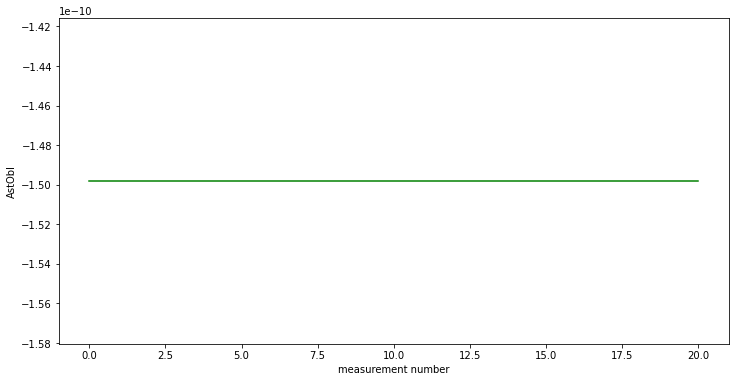

In [123]:
dec2 = DecenteredAnalysis()
dec2.addData('data/withZern/decentred_X1_0_3_0_1.json')
dec2.addData('data/withZern/decentred_X2_0_3_0_1.json')
dec2.addData('data/withZern/decentred_X3_0_3_0_1.json')
dec2.learnAstObl(model='poly', degree=7)
dec2.print_AstObl_real_pred_chart()

In [248]:
thicknesses = ThicknessesAnalysis()
thicknesses.addData('data/thicknesses.json')
thicknesses.learn_all()

In [16]:
thicks_dif_files = os.listdir('data_diff')
thicks_dif_files.pop(1)

'.DS_Store'

In [17]:
thicks_dif_files

['thick1_1.json',
 'thick3_1.json',
 'thick2_2.json',
 'thick1_4.json',
 'thick2_1.json',
 'thick3_2.json',
 'thick1_3.json',
 'thick1_2.json']

In [30]:
thicks_dif_files_1 = list(filter(lambda x: x[:6] == 'thick1', thicks_dif_files))

In [20]:
thicknesses2 = ThicknessesAnalysis()
for name in thicks_dif_files:
    thicknesses2.addData('data_diff/'+name)
thicknesses2.learn_all()

In [39]:
decenters = DecenteredAnalysis()
decenters.addData('data/decentred_0_1_0_01.json')
decenters.addData('data/decentred_X1_X3_0_5_0_5.json')
decenters.addData('data/decentred_0_5_0_1.json')
decenters.addData('data/decentred_X2_0_5_0_1.json')
decenters.addData('data/decentred_X1_X2_0_1_0_1.json')
decenters.addData('data/decentred_X3_0_5_0_1.json')
decenters.addData('data/decentred_X1_X2_0_5_0_1.json')
      


In [65]:
dec2 = DecenteredAnalysis()
dec2.addData('data/withZern/decentred_X1_0_3_0_1.json')
dec2.addData('data/withZern/decentred_X2_0_3_0_1.json')
dec2.addData('data/withZern/decentred_X3_0_3_0_1.json')
dec2.learnAstObl()

In [66]:
dec2.learnAstObl()

KeyError: 'astigmatism_obl'

In [ ]:
ar = []
for item in dec2.data:
    zers = item.zernike
    for el in zers:
        if el['wavelength']== 0.4 and el['fieldX'] == 0.0 and el['fieldY'] == 0.0:
            

In [34]:
[float(decenters.data[i]['foc_surf']) - for i in range(len(decenters.data))]

SyntaxError: invalid syntax (<ipython-input-34-93ea6cc21cdc>, line 1)

In [37]:
max([np.abs(decenters.focus_real_pred[i]['real'] - decenters.focus_real_pred[i]['predicted']) for i in range(len(decenters.focus_real_pred))])

0.017264117807709756

polynom 8


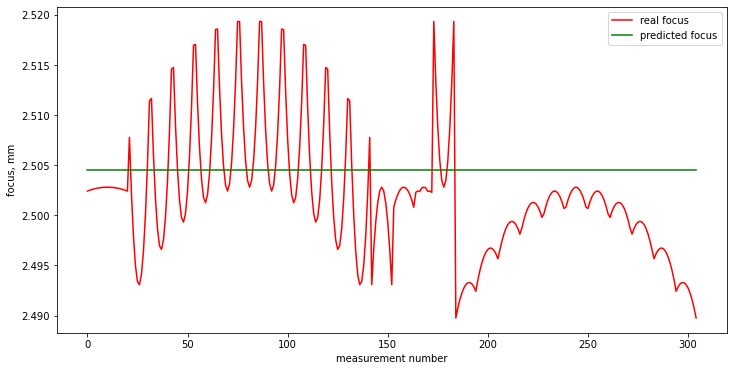

In [42]:
decenters.learn_focus(model='poly', degree=8)
decenters.print_focus_real_pred_chart()

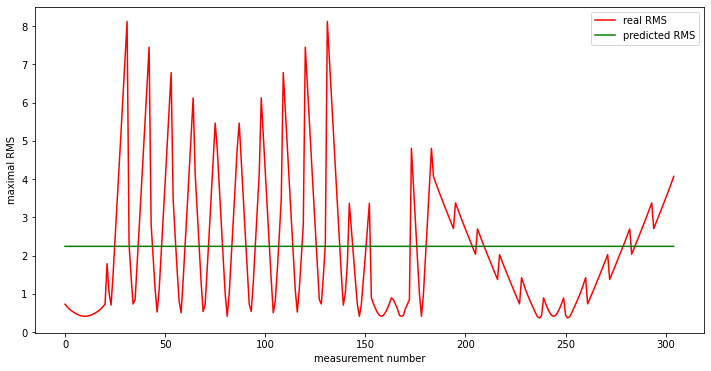

In [50]:
decenters.learn_RMS(model='linear', degree=4)
decenters.print_RMS_real_pred_chart()

#### decenters.print_focus_real_pred_chart()

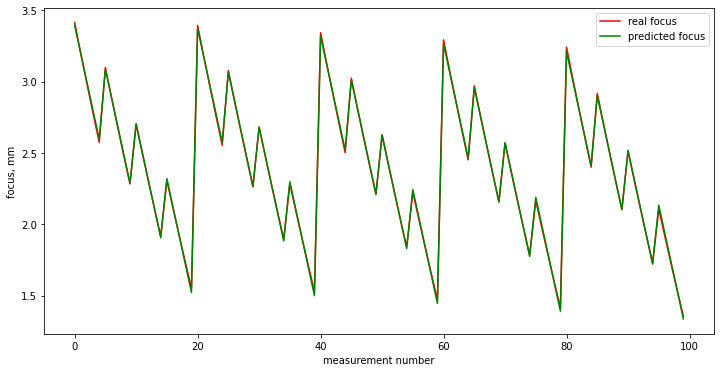

In [230]:
thicknesses.print_focus_real_pred_chart()

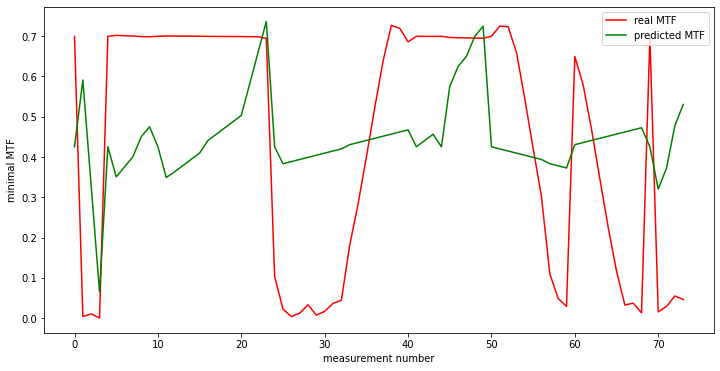

In [22]:
thicknesses2.print_MTF_real_pred_chart()

In [38]:
thicknesses_diff_1 = ThicknessesAnalysis()
for name in thicks_dif_files_1:
    thicknesses_diff_1.addData('data_diff/'+name)
thicknesses_diff_1.learn_all()

In [39]:
thicknesses_diff_1.print_MTF_table()

TypeError: makePrettyTable() takes 2 positional arguments but 3 were given